Celem tych laboratoriów jest zapoznanie się z podstawowymi metrykami klasyfikacji w uczeniu maszynowym oraz praktyczne zastosowanie ich do oceny wytrenowanych modeli. Poprzez analizę wyników dwóch różnych klasyfikatorów nauczymy się  interpretować metryki oraz zrozumieć ich znaczenie w kontekście realnych problemów klasyfikacyjnych.

**scikit-learn** (skrótowo `sklearn`) to jedna z najbardziej popularnych bibliotek w Pythonie dla uczenia maszynowego. Oferuje ona prosty i skuteczny zestaw narzędzi do analizy danych, w tym klasyfikacji, regresji, klasteryzacji i redukcji wymiarowości. W trakcie tych laboratoriów skupimy się głównie na modułach dotyczących klasyfikacji. Aby wykorzystać pełny potencjał biblioteki, studenci będą musieli samodzielnie wyszukiwać odpowiednie funkcje i metody w dokumentacji scikit-learn lub innych źródłach.

# Przygotowanie danych i modeli

Poniższe komórki trzeba uruchomić w celu rozwiązania zadania ale nie trzeba wchodzić w to jak dokładnie działają, ważny jest efekt końcowy - 2 wytrenowane klasyfikatory

In [ ]:
# @title Pobranie danych
!wget -q https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
!unzip -qq /content/breast+cancer+wisconsin+diagnostic.zip


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
# @title Przygotowanie danych
df = pd.read_csv('wdbc.data')
x = df.iloc[:, [j for j, c in enumerate(df.columns) if j not in [0,1]]]
y = df.iloc[:,1]
y = y.iloc[:].map({'M':1,"B":0})
x = x.to_numpy()
y = y.to_numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# @title Trening klasyfikatorów
from sklearn.linear_model import LogisticRegression
clf_1 = LogisticRegression(C=1.0, class_weight={0:15,1:0.2}, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                  random_state=None, solver='lbfgs', tol=0.0001,       verbose=0,
                  warm_start=False)
clf_2 = LogisticRegression(C=1.0, class_weight={0:0.1,1:650}, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                  random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                  warm_start=False)
clf_1.fit(X_train,y_train)
clf_2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

LogisticRegression(class_weight={0: 0.1, 1: 650})

# Kontekst

Masz do dyspozycji
* 2 różne modele wytrenowane na tych samych danych
  * `clf_1`
  * `clf_2`

  Modele przewidują na podstawie 30 cech mammografii (w które nie będziemy wchodzić) czy nowotwór piersi jest złośliwy czy łagodny
* zbiór testowy na którym będziesz oceniać wyniki modeli
 * `X_text` zawierający dane wejściowe do modelu
 * `y_test` zawierający etykiety danych które powinien przewidzieć model na podstawie danych `X_test`

 Twoim celem jest ocena działania dwóch modeli korzystając ze zbioru testowego

## Zbiór X_test

In [ ]:
len(X_test) # 114 przykładów

114

In [ ]:
X_test.shape # model używa 30 cech aby przewidzieć wynik

(114, 30)

# Zbiór y_test

Etykiety danych
* 0 - guz łagodny
* 1 - guz złośliwy

In [ ]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

## Predykcje modeli

In [ ]:
y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)

In [ ]:
y_pred_1

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0])

Podczasa zadań należy porównać `y_pred` z `y_test`

# Zadania

## 1 Podstawowe metryki

### 1.1 Oblicz dokładność (accuracy) obu klasyfikatorów clf_1 i clf_2 na zbiorze testowym.

In [ ]:
import sklearn.metrics as sk

In [ ]:
accuracy_clf1 = sk.accuracy_score(y_test, y_pred_1)
accuracy_clf2 = sk.accuracy_score(y_test, y_pred_2)

### 1.2 Oblicz precyzję i recall i F1 dla obu klasyfikatorów. Który z klasyfikatorów ma wyższą precyzję, a który wyższy recall?

In [ ]:
precision_clf1 = sk.precision_score(y_test, y_pred_1, average='binary')
recall_clf1 = sk.recall_score(y_test, y_pred_1, average='binary')
f1_clf1 = sk.f1_score(y_test, y_pred_1, average='binary')

precision_clf2 = sk.precision_score(y_test, y_pred_2, average='binary')
recall_clf2 = sk.recall_score(y_test, y_pred_2, average='binary')
f1_clf2 = sk.f1_score(y_test, y_pred_2, average='binary')

print(f"Klasyfikator clf_1: Precyzja: {precision_clf1}, Recall: {recall_clf1}, F1-score: {f1_clf1}")
print(f"Klasyfikator clf_2: Precyzja: {precision_clf2}, Recall: {recall_clf2}, F1-score: {f1_clf2}")

Klasyfikator clf_1: Precyzja: 1.0, Recall: 0.7608695652173914, F1-score: 0.8641975308641976
Klasyfikator clf_2: Precyzja: 0.7076923076923077, Recall: 1.0, F1-score: 0.8288288288288288


*Odpowiedź*: Klasyfikator **clf_1** ma wyższą *precyzję*. Klasyfikator **clf_2** ma wyższy *recall*.

### 1.3 Wygeneruj macierz błędów dla obu klasyfikatorów i przedstaw je w formie wizualnej. Na podstawie tej macierzy, określ, który klasyfikator ma więcej **fałszywie pozytywnych** wyników.

Wskazówka: możesz korzystać z biblitek do wyświetlania wykresów w pythonie takich jak `matlotlib`, `plotly` czy `seaborn`. Sklearn ma też wbudowaną funkcję do wyświetlania macierzy pomyłek

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

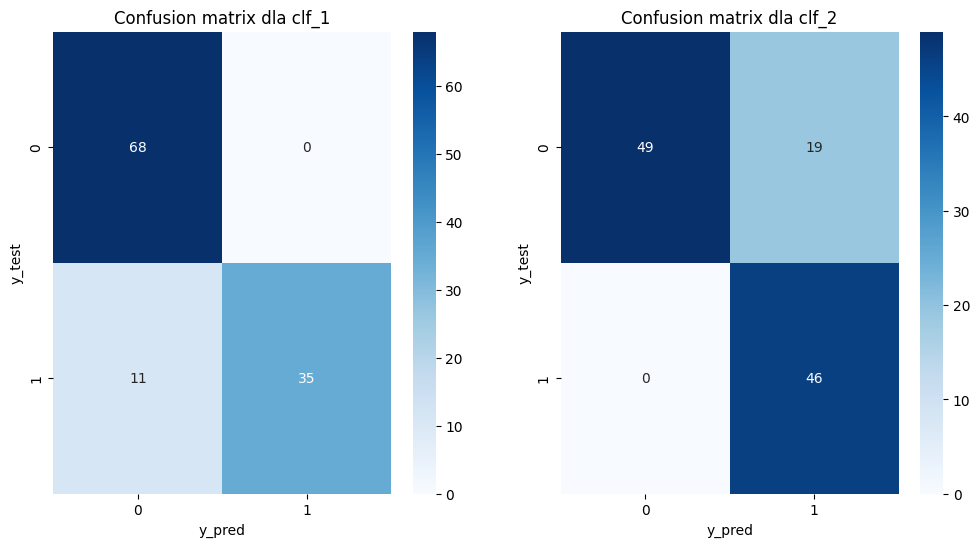

In [ ]:
cm_clf1 = sk.confusion_matrix(y_test, y_pred_1)
cm_clf2 = sk.confusion_matrix(y_test, y_pred_2)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_clf1, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion matrix dla clf_1')
ax[0].set_xlabel('y_pred')
ax[0].set_ylabel('y_test')

sns.heatmap(cm_clf2, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion matrix dla clf_2')
ax[1].set_xlabel('y_pred')
ax[1].set_ylabel('y_test')

plt.show()

Odpowiedź: Klasyfikator **clf_2** ma więcej *fałszywie pozytywnych* wyników.

## Zawansowane metryki

### 2.1 Dla obu klasyfikatorów clf_1 i clf_2, narysuj krzywą ROC (Receiver Operating Characteristic) oraz oblicz pole pod krzywą (AUC). Dlaczego krzywa ROC wygląda niemal identycznie skoro klasyfikaory mają różne wyniki?

Wskazówka - do tej metryki będziemy potrzebowali uzyskać nie tylko przewidziane przez model klasy ale też ich prawdopodobieństwa, mozna skorzystać z funkcji `clf.predict_proba()` ale zwraca ona 2 tablice jedną dla klasy 0 drugą dla klasy 1. Do naszej anali potrzebujemy tylko jednej tablicy bo liczymy metryky względem klasy 1

Wskazówka: jest do tego wbudowana funkcja w sklearn

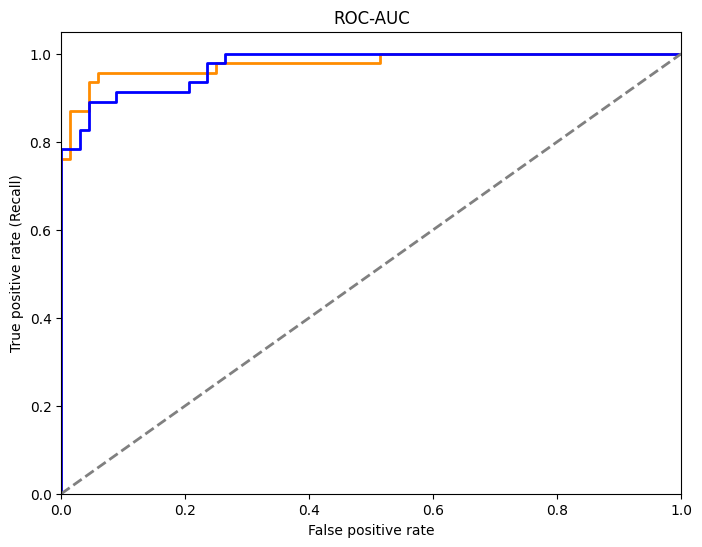

In [ ]:
y_proba_clf1 = clf_1.predict_proba(X_test)
y_proba_clf2 = clf_2.predict_proba(X_test)

fpr_clf1, tpr_clf1, _ = sk.roc_curve(y_test, y_proba_clf1[:, 1])
roc_auc_clf1 = sk.auc(fpr_clf1, tpr_clf1)

fpr_clf2, tpr_clf2, _ = sk.roc_curve(y_test, y_proba_clf2[:, 1])
roc_auc_clf2 = sk.auc(fpr_clf2, tpr_clf2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_clf1, tpr_clf1, color='darkorange', lw=2)
plt.plot(fpr_clf2, tpr_clf2, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Recall)')
plt.title('ROC-AUC')
plt.show()

Odpowiedź:
Jeśli oba klasyfikatory są testowane na zbliżonych zbiorach danych, które wykazują podobne charakterystyki i strukturę, to można oczekiwać, że oba klasyfikatory dadzą zbliżone wyniki

### 2.2 Dla obu klasyfikatorów narysuj krzywą Precision-Recall.

Wskazówka: jest do tego wbudowana funkcja w sklearn

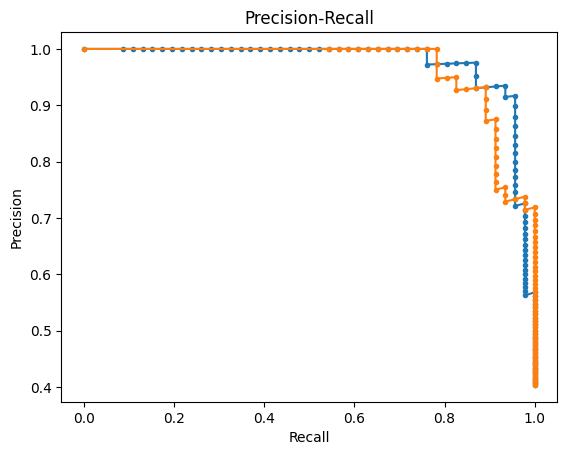

In [ ]:
precision_clf1, recall_clf1, _ = sk.precision_recall_curve(y_test, y_proba_clf1[:, 1])

precision_clf2, recall_clf2, _ = sk.precision_recall_curve(y_test, y_proba_clf2[:, 1])

plt.plot(recall_clf1, precision_clf1, marker='.')
plt.plot(recall_clf2, precision_clf2, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.show()

### 2.3 Oblicz precision, recall i f1 dla tresholdu 0.7

W poprzednim zadaniu zaobserwowaliśmy jak zmienia się precyzja i recall modelu w zależości od różnych tresholdów

Do tej pory do liczenia metryk używaliśmy używaliśmy wyniku `model.predict()` ta funcja zwraca najbardziej prawdopodobną klasę. Ale możemy ręcznie uznać od którego momentu uznajemy że wynik należy do klasy 0 albo 1 np. możemy uznać coś za klase 1 dopiero jeśli prawdopodobieństwo które zwróci model dla tej klasy jest wyższe niż 70%. W tym zdania użyj prawdopodobieństw zwróconych przez model i ręcznie policz `y_pred` pod warunkiem że klasa 1 jest przewidziana dopier od prawdopodobieństwa 0.7

In [ ]:
y_pred_clf1_threshold = (y_proba_clf1[:, 1] >= 0.7).astype(int)
y_pred_clf2_threshold = (y_proba_clf2[:, 1] >= 0.7).astype(int)

precision_clf1_threshold = sk.precision_score(y_test, y_pred_clf1_threshold)
recall_clf1_threshold = sk.recall_score(y_test, y_pred_clf1_threshold)
f1_clf1_threshold = sk.f1_score(y_test, y_pred_clf1_threshold)

precision_clf2_threshold = sk.precision_score(y_test, y_pred_clf2_threshold)
recall_clf2_threshold = sk.recall_score(y_test, y_pred_clf2_threshold)
f1_clf2_threshold = sk.f1_score(y_test, y_pred_clf2_threshold)

print(f"Klasyfikator clf_1: Precyzja: {precision_clf1_threshold}, Recall: {recall_clf1_threshold}, F1-score: {f1_clf1_threshold}")
print(f"Klasyfikator clf_2: Precyzja: {precision_clf2_threshold}, Recall: {recall_clf2_threshold}, F1-score: {f1_clf2_threshold}")

Klasyfikator clf_1: Precyzja: 1.0, Recall: 0.7391304347826086, F1-score: 0.85
Klasyfikator clf_2: Precyzja: 0.7377049180327869, Recall: 0.9782608695652174, F1-score: 0.8411214953271028


### 2.4 Ustal optymalną wartość tresholdu dla której model osiąga największą wartość metryki F1.
Jeśli zwiększamy treshold to model będzie mieć większą precyzje ale mniejszy recall (patrz zdanie 2.2). Sprawająć różne kombiacje tresholdu ustal taką wartość jego dla której metryk F1 jest największa

In [ ]:
y_pred_clf1_threshold_max = (y_proba_clf1[:, 1] >= 0.1).astype(int)
y_pred_clf2_threshold_max = (y_proba_clf2[:, 1] >= 0.7).astype(int)

f1_clf1_threshold_max = sk.f1_score(y_test, y_pred_clf1_threshold_max)

f1_clf2_threshold_max = sk.f1_score(y_test, y_pred_clf2_threshold_max)

print(f"Klasyfikator clf_1: F1-score: {f1_clf1_threshold_max}")
print(f"Klasyfikator clf_2: F1-score: {f1_clf2_threshold_max}")

Klasyfikator clf_1: F1-score: 0.8674698795180723
Klasyfikator clf_2: F1-score: 0.8411214953271028


## 3 Interpretacja wyników modelu

Przenalizujmy parę scenariuszy w którch możemy wykorzystać modele.W każdym z tych scenariuszy jeden z klasyfikatorów (clf_1 lub clf_2) będzie bardziej odpowiedni w zależności od konkretnych wymagań i okolicznośc. Na podsawie wyników poprzednich zdań oceń kóry klasyfikator sprawdzi się lepiej. W kolejnych scenariuszach możemy na chwilę zapomieć o tym że model dotyczył raka piersi i skupić na innych zdaniach do którym miałby potecjalnie zostać wykorzystany model z takimi wynikami

### 3.1 Nowa eksperymentalna terapia
W pewnym szpitalu rozważają wprowadzanie modelu który bedzie przewidywać czy skierować pacjentów na nową eksperymentalną terapię. Ta terapia może potencjalnie ocalić życie pacjenta ale jest zwiazana z dyżym ryzykiem i powinny na nią trafić tylko osoby u których na pewno wykryto nowotwór złośliwy

Odpowiedź: **clf_1**

### 3.2 Badania przesiewowe

Ministersto zdrowia rozważa użycie modelu w badaniach przesiewowych które mają na celu wczesne wykrycie pewnej choroby w populacji i skierowanie osób na dodatkowe badania. Najważniejszym celem jest zidentyfikowanie jak największej liczby osób faktycznie chorujących. Skierowanie na dodatkowe badania osób które na nie trafić jest oczywiście nieporządane ale jest mniejszym problemem niż gdyby nie trafiła na nie osoba która powinna na nie trafić

Odpowiedź: **clf_2**

### 3.3 Marketingowe kampanie e-mailowe

Firma chce wysyłać promocyjne e-maile do potencjalnych klientów. Wysyłanie zbyt wielu e-maili do niezainteresowanych klientów może spowodować, że zostaną oni oznaczeni jako spam, co wpłynie na reputację firmy. Jednak przegapienie potencjalnego klienta nie jest tak kosztowne

Odpowiedź: **clf_1**

### 3.4 System monitorowania bezpieczeństwa

Firma bezpieczeństwa chce monitorować transmisje wideo w poszukiwaniu podejrzanych zachowań. Chcą wykryć jak najwięcej potencjalnych zagrożeń, nawet jeśli oznacza to więcej fałszywych alarmów, które potem muszą ręcznie przeglądać operatorzy.

Odpowiedź: **clf_2**

### 3.5 : System rekomendacji filmów

Serwis streamingowy chce rekomendować filmy użytkownikom na podstawie ich historii oglądania. W tym przypadku ważniejsze jest polecanie filmów, które użytkownik może lubić (nawet jeśli niektóre rekomendacje są nietrafione), niż pomijanie potencjalnie dobrych rekomendacji.

Odpowiedź: **clf_2**